# Linear Regression 

Linear regression is a statistical method used to model the relationship between a dependent variable (often denoted as "y") and one or more independent variables (often denoted as "x"). The basic idea of linear regression is to find the straight line that best fits the data points in a scatter plot.

The most common form of linear regression is simple linear regression, which models the relationship between two variables:

$\hat{y} = mx + b$

where $\hat{y}$ is the predicted value, $x$ is the independent variable, $m$ is the slope, and $b$ is the intercept. 

Given a set of input data ($\{x_i, y_i\}$), the goal of linear regression is to find the values of $m$ and $b$ that best fit the data


The values of $m$ and $b$ are chosen to minimize the ***sum of squared errors***.

$SSE = \sum (y_i - \hat{y_i})^2$

substituting $\hat{y}_i = m x_i + b$:

$$
SSE = \sum (y_i - (m x_i + b))^2
$$


To minimize $SSE$, we take the partial derivatives with respect to $m$ and $b$ and set them equal to 0.

### **Derivative with Respect to $b$:**

$$
\frac{\partial SSE}{\partial b} = \sum 2 (y_i - (m x_i + b)) (-1) = -2 \sum (y_i - m x_i - b) = 0
$$

Dividing by $-2$:

$$
\sum (y_i - m x_i - b) = 0
$$

Rearranging:

$$
\sum y_i = m \sum x_i + b \sum 1
$$

Since $\sum 1 = n$, we get:

$$
\sum y_i = m \sum x_i + n b
$$

Dividing by $n$:

$$
b = \frac{\sum y_i}{n} - m \frac{\sum x_i}{n}
$$

Since $x_{\text{mean}} = \frac{\sum x_i}{n}$ and $y_{\text{mean}} = \frac{\sum y_i}{n}$, this simplifies to:

$$
b = y_{\text{mean}} - m x_{\text{mean}}
$$

### **Derivative with Respect to $m$:**

$$
\frac{\partial SSE}{\partial m} = \sum 2 (y_i - (m x_i + b)) (-x_i) = -2 \sum x_i (y_i - m x_i - b) = 0
$$

Dividing by $-2$:

$$
\sum x_i (y_i - m x_i - b) = 0
$$

Expanding:

$$
\sum x_i y_i - m \sum x_i^2 - b \sum x_i = 0
$$

Substituting $b = y_{\text{mean}} - m x_{\text{mean}}$:

$$
\sum x_i y_i - m \sum x_i^2 - (y_{\text{mean}} - m x_{\text{mean}}) \sum x_i = 0
$$

Rearranging:

$$
\sum x_i y_i - y_{\text{mean}} \sum x_i = m \left( \sum x_i^2 - x_{\text{mean}} \sum x_i \right)
$$

Dividing by $\sum x_i^2 - x_{\text{mean}} \sum x_i$:

$$
m = \frac{\sum x_i y_i - y_{\text{mean}} \sum x_i}{\sum x_i^2 - x_{\text{mean}} \sum x_i}
$$

Using the mean-centered formulation:

$$
m = \frac{\sum (x_i - x_{\text{mean}})(y_i - y_{\text{mean}})}{\sum (x_i - x_{\text{mean}})^2}
$$

Thus, the best-fit parameters for simple linear regression are:

$$
\boxed{m = \frac{\sum (x_i - x_{\text{mean}})(y_i - y_{\text{mean}})}{\sum (x_i - x_{\text{mean}})^2}}
$$

$$
\boxed{b = y_{\text{mean}} - m x_{\text{mean}}}
$$

Multiple linear regression is a more general form of linear regression that models the relationship between multiple independent variables and one dependent variable. The formula for the best-fit hyperplane in multiple linear regression is:

$$
y = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n
$$

where:

- $Y$ is the dependent variable (output).
- $x_1, x_2, \dots, x_n$ are the independent variables (input features).
- $w_0$ is the **intercept** (bias term).
- $w_1, w_2, \dots, w_n$ are the **weights (coefficients)** that determine the influence of each feature.

or, in vectorized form:

$$
Y = X W
$$

where:
- $Y$ is an  $m \times 1$ vector (outputs for all data points),
- $X$ is an  $m \times (n+1)$ **design matrix** (including the intercept column),
- $W$ is an  $(n+1) \times 1$ vector of weights.

- $X$ is typically represented as:

  $$
  X =
  \begin{bmatrix}
  1 & x_{11} & x_{12} & \dots & x_{1n} \\
  1 & x_{21} & x_{22} & \dots & x_{2n} \\
  \vdots & \vdots & \vdots & \dots & \vdots \\
  1 & x_{m1} & x_{m2} & \dots & x_{mn}
  \end{bmatrix}
  $$

  where each row represents a data sample, and the first column of ones accounts for the intercept term $w_0$.

- $W$ is the **weight vector**:

  $$
  W =
  \begin{bmatrix}
  w_0 \\
  w_1 \\
  w_2 \\
  \vdots \\
  w_n
  \end{bmatrix}
  $$


## Code 
### Simple linear regression 
Here is a basic implementation of simple linear regression in Python using the least squares method:

In [18]:
import numpy as np


class LinearRegression:
    def __init__(self):
        self.slope = None  # m
        self.intercept = None  # b

    def fit(self, X, y):
        n = X.shape[0]  # or we can also take len(X)
        x_mean = np.mean(X)
        y_mean = np.mean(y)

        num = 0
        den = 0

        for i in range(n):
            num = num + ((X[i] - x_mean) * (y[i] - y_mean))
            den = den + (X[i] - x_mean) ** 2

        self.slope = num / den
        self.intercept = y_mean - (self.slope * x_mean)

    def predict(self, X):
        y_pred = []

        for x in X:
            y_pred.append(self.slope * x + self.intercept)
        return y_pred
        # return np.array(y_pred)

In [19]:
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])
lr = LinearRegression()
lr.fit(X, y)
print("Slope (m) = ", lr.slope)
print("Intercept (b) = ", lr.intercept)
y_pred = lr.predict(X)
print("y_pred =", y_pred)
# print(y_pred.shape)

Slope (m) =  0.6
Intercept (b) =  2.2
y_pred = [2.8000000000000003, 3.4000000000000004, 4.0, 4.6, 5.2]


### Derivation of the Vectorized Linear Regression Formula

To derive the closed-form solution for the weights W in linear regression using the least squares method.

#### **1. Linear Regression Model**
The linear regression model can be written in a vectorized form as:

$$
y = XW
$$

where:
- X is an $(n \times d)$ matrix (with  n samples and  d features),
- W is a $(d \times 1)$ column vector of model parameters (weights),
- y is an $(n \times 1)$ column vector of target values.

#### **2. Loss Function (Least Squares Error)**
We use the mean squared error (MSE) loss function:

$$
L(W) = \sum_{i=1}^{n} (y_i - X_i W)^2
$$

which can be written in matrix form as:

$$
L(W) = (y - XW)^T (y - XW)
$$

Expanding this:

$$
L(W) = y^T y - 2 W^T X^T y + W^T X^T X W
$$

#### **3. Compute the Gradient**
To minimize L(W), we take the derivative with respect to  W:

$$
\frac{dL}{dW} = -2X^T y + 2X^T X W
$$

Setting the gradient to zero:

$$
-2X^T y + 2X^T X W = 0
$$

$$
X^T X W = X^T y
$$

#### **4. Solve for W**
If $X^T X$ is invertible, we multiply both sides by $(X^T X)^{-1}$:

$$
W = (X^T X)^{-1} X^T y
$$

#### **Final Vectorized Solution**
$$
\boxed{W = (X^T X)^{-1} X^T y}
$$

This is the closed-form solution for the optimal weights in ordinary least squares (OLS) regression.


In [20]:
class LinearRegression:
    def __init__(self):
        self.W = None

    def fit(self, X, y):
        n = X.shape[0]
        # Add bias term using column wise concatination X -> [1 X]
        X = np.c_[np.ones(n), X]
        self.W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        # Add bias term using column wise concatination
        X = np.c_[np.ones(X.shape[0]), X]
        y_pred = X.dot(self.W)
        return y_pred

In [21]:
# Create example input data
X = np.array([[2, 2], [4, 5], [7, 8]])
y = np.array([9, 17, 26])

lr = LinearRegression()
lr.fit(X, y)
print("W =", lr.W)
y_pred = lr.predict(X)
print("y_pred =", y_pred)

X_new = np.array([[10, 11], [13, 14]])
y_pred = lr.predict(X_new)
print("new_y_pred =", y_pred)

W = [3. 1. 2.]
y_pred = [ 9. 17. 26.]
new_y_pred = [35. 44.]


### Improvements 
here are some improvements to the simple linear regression implementation to make it more robust:

1. Add input **validation**: Add input validation to check that the input arrays $X$ and $y$ have the same length and are not empty.

2. Use NumPy broadcasting: Instead of looping through the data to calculate the numerator and denominator, we can use NumPy broadcasting to perform the calculations in a vectorized way. This will make the code faster and more efficient.

3. Add **regularization**: Regularization can help prevent overfitting by adding a penalty term to the cost function. One common regularization technique is L2 regularization, which adds the sum of squares of the coefficients to the cost function. This can be easily added to the code by adding a regularization parameter to the constructor.

4. Use **gradient descent**: For large datasets, calculating the inverse of the matrix in the normal equation can be computationally expensive. To overcome this, we can use gradient descent to minimize the cost function. This can be implemented by adding a method that updates the coefficients iteratively using the gradient descent algorithm.

Here's the updated code that incorporates these improvements:

In [22]:
import numpy as np


class LinearRegressionGD:
    def __init__(self, regularization=0):
        self.regularization = regularization
        self.W = None

    def fit(self, X, y, lr=0.01, epochs=1000):
        # X: n x d
        # Add bias term to X using column wise concatination
        X = np.c_[np.ones(X.shape[0]), X]

        # Take W with all zeros in d dimensions
        self.W = np.zeros(X.shape[1])

        for i in range(epochs):

            # cal the predicted y value
            y_pred = np.dot(X, self.W)

            # cal the cost function using ridge regression loss function
            cost = np.sum(y_pred - y) ** 2 + self.regularization * np.sum(self.W) ** 2

            # cal gradient descent
            gradient = 2 * np.dot(X.T, (y_pred - y)) + 2 * self.regularization * self.W

            # update W
            self.W = self.W - lr * gradient

            if i % 1000 == 0:
                print("cost after 1000 epochs =", cost)

    def predict(self, X):
        # Add bias term to X
        X = np.c_[np.ones(X.shape[0]), X]
        y_pred = np.dot(X, self.W)
        return y_pred

### Test

In [23]:
X = np.array([[1, 2, 3, 4, 5]]).T
y = np.array([2, 4, 5, 4, 5])
lr = LinearRegressionGD(regularization=0.1)
lr.fit(X, y, lr=0.01, epochs=10000)
print("W =", lr.W)
y_pred = lr.predict(X)
print("y_pred =", y_pred)

cost after 1000 epochs = 400.0
cost after 1000 epochs = 0.7438784376655634
cost after 1000 epochs = 0.7438784380617114
cost after 1000 epochs = 0.7438784380617114
cost after 1000 epochs = 0.7438784380617114
cost after 1000 epochs = 0.7438784380617114
cost after 1000 epochs = 0.7438784380617114
cost after 1000 epochs = 0.7438784380617114
cost after 1000 epochs = 0.7438784380617114
cost after 1000 epochs = 0.7438784380617114
W = [1.99964292 0.65345474]
y_pred = [2.65309766 3.3065524  3.96000714 4.61346188 5.26691662]


The model is converging:
- The cost function initially decreases rapidly, indicating that the gradient descent is working.
- After some point, the cost stops decreasing, which suggests that the model has reached a minimum (either global or local).

Gradient updates are very small:
- The last few values are almost identical, meaning the weight updates are too small to change the cost.
- This usually happens when the model has learned well or reached numerical precision limits.

Possible early stopping point:
- Since the cost is no longer improving, continuing training won’t help.
- You could add an early stopping condition (e.g., stop training if the cost changes by less than a small threshold like 10−610−6).

Visualization

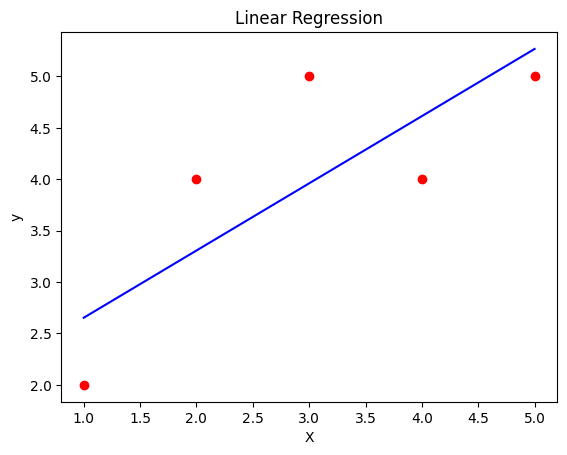

In [27]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color="red")
plt.plot(X, y_pred, color="blue")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression")
plt.show()